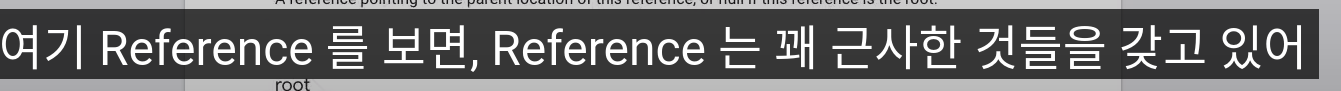

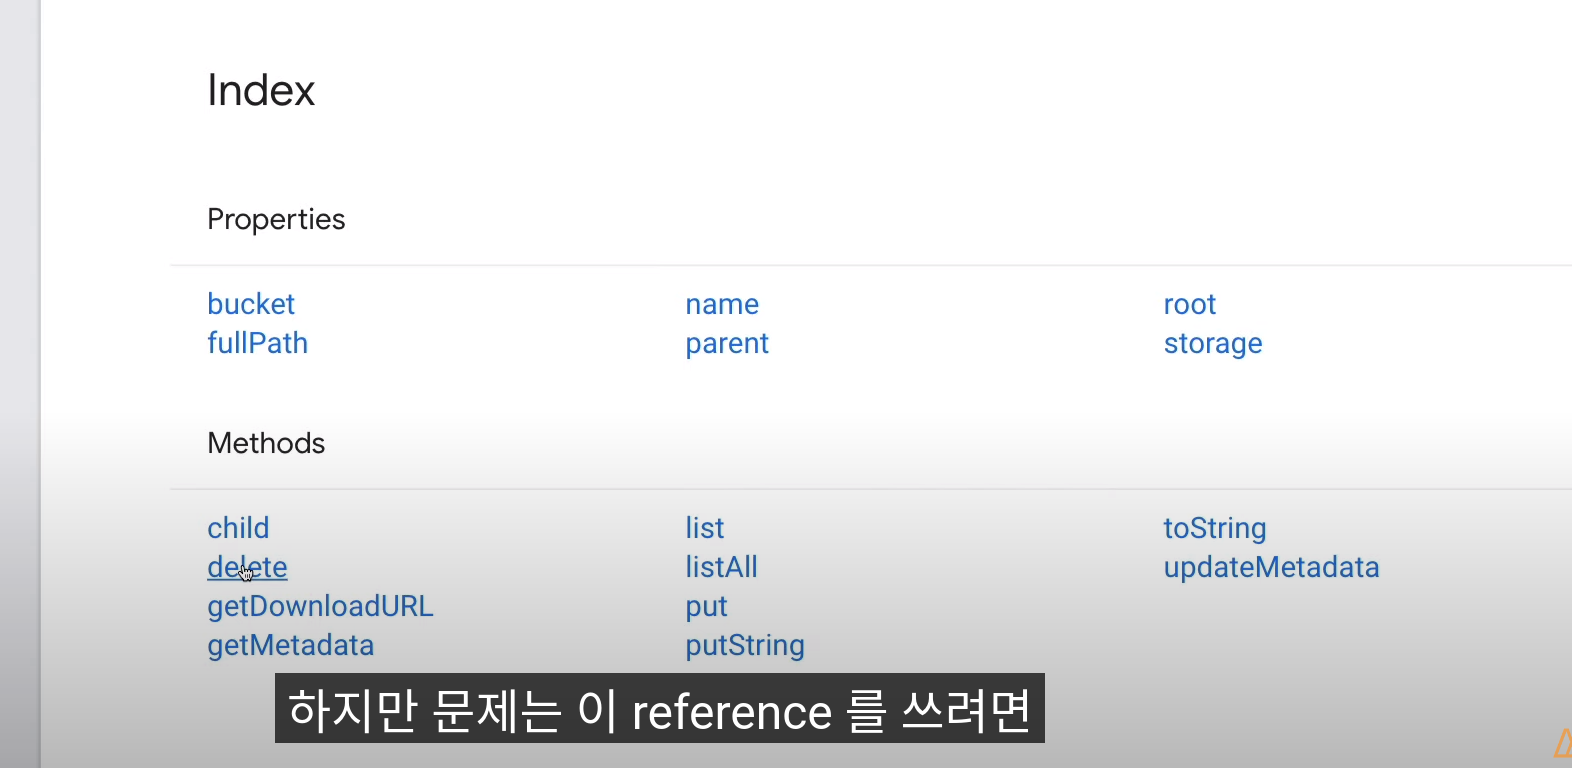

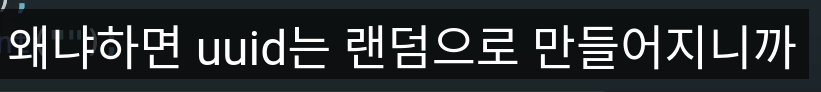

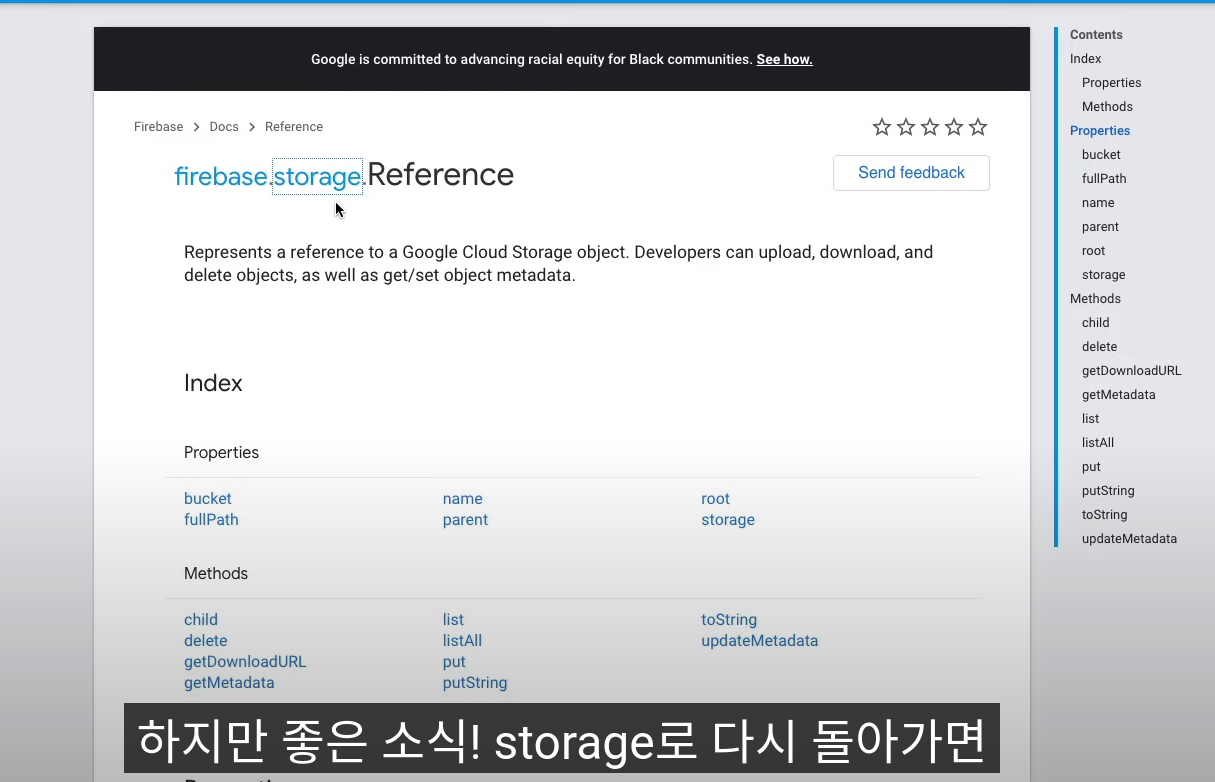

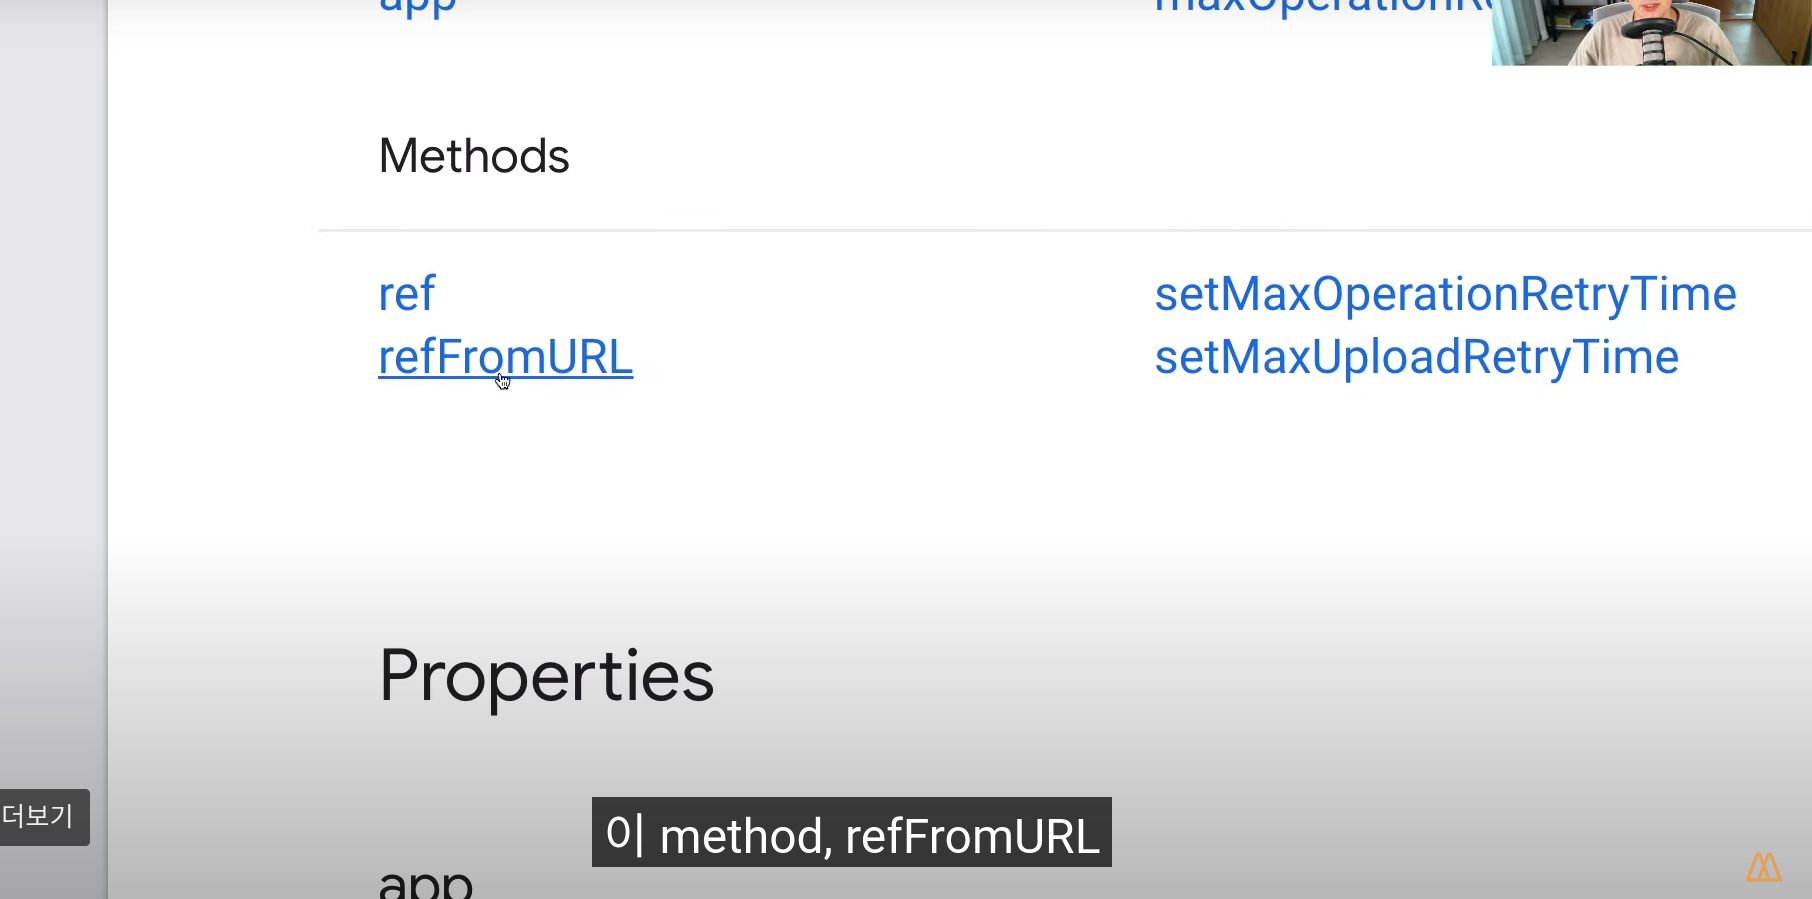

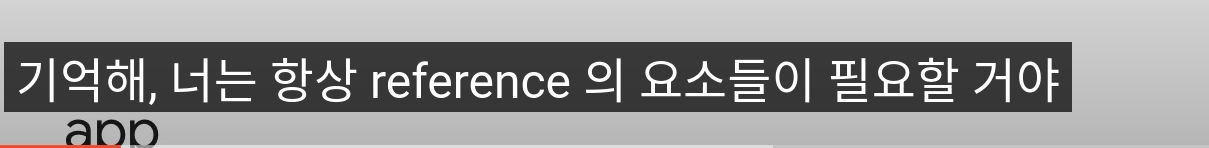

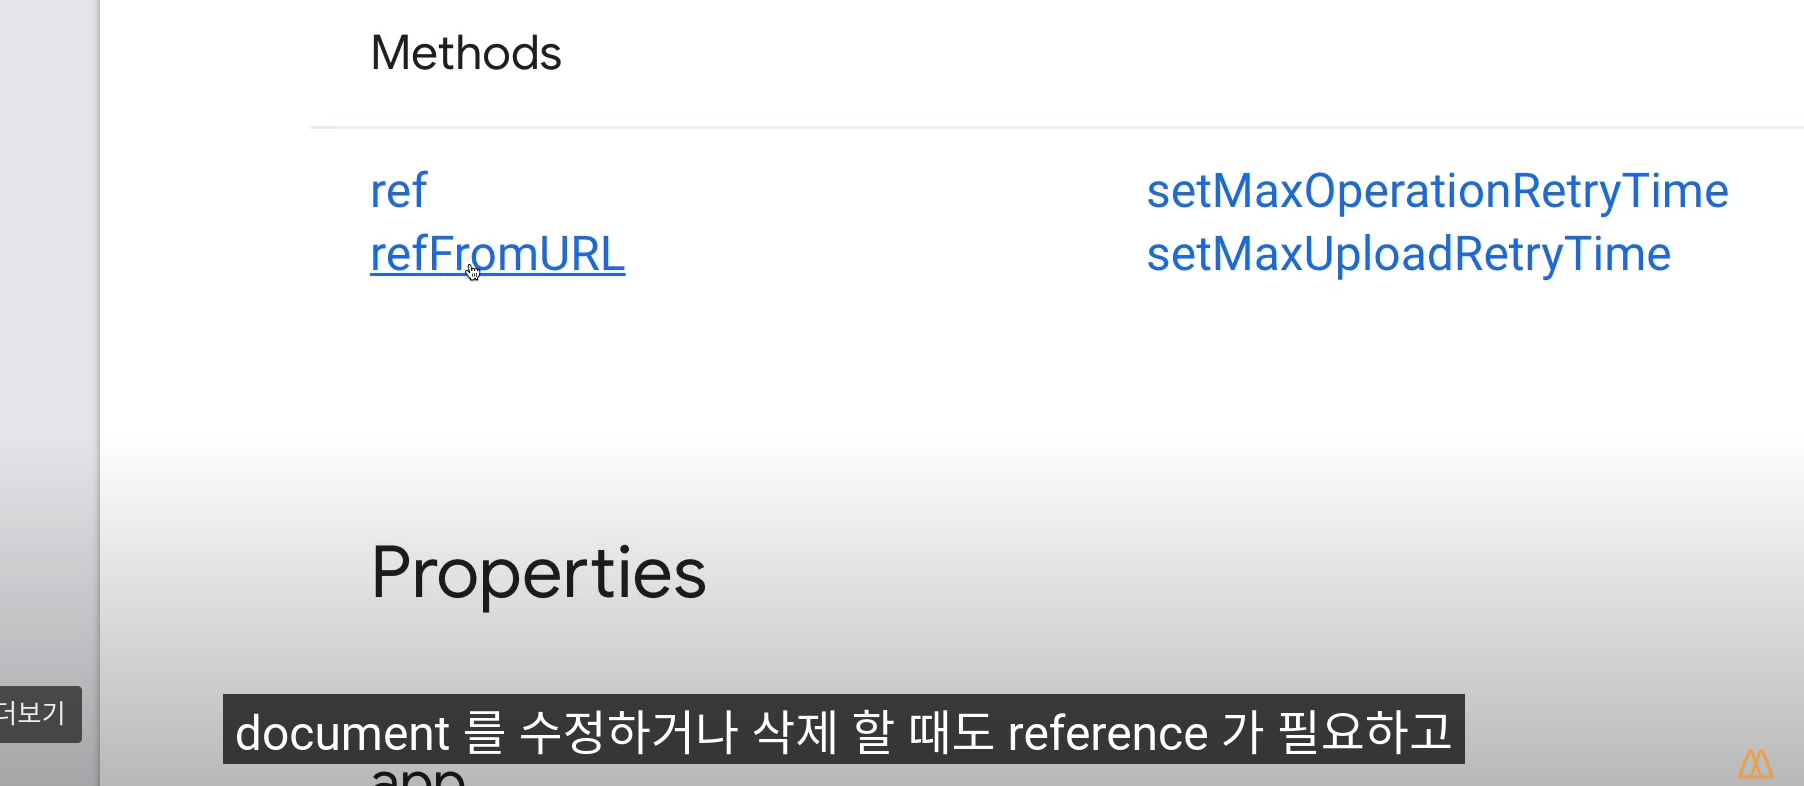

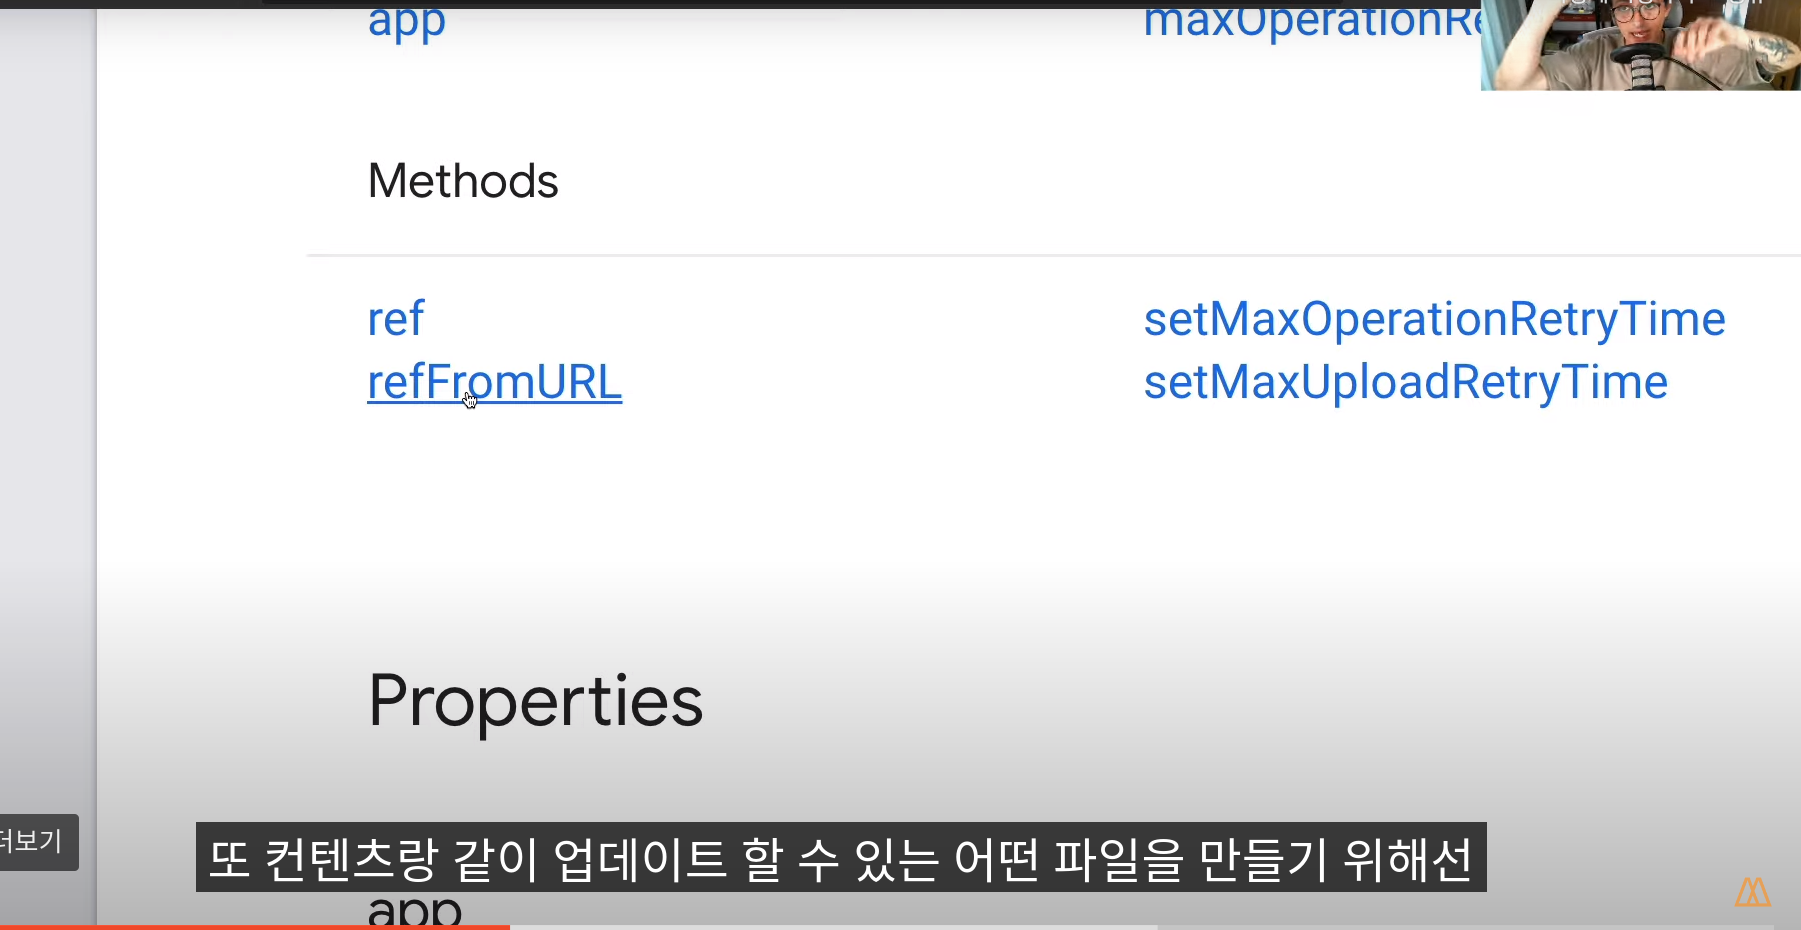

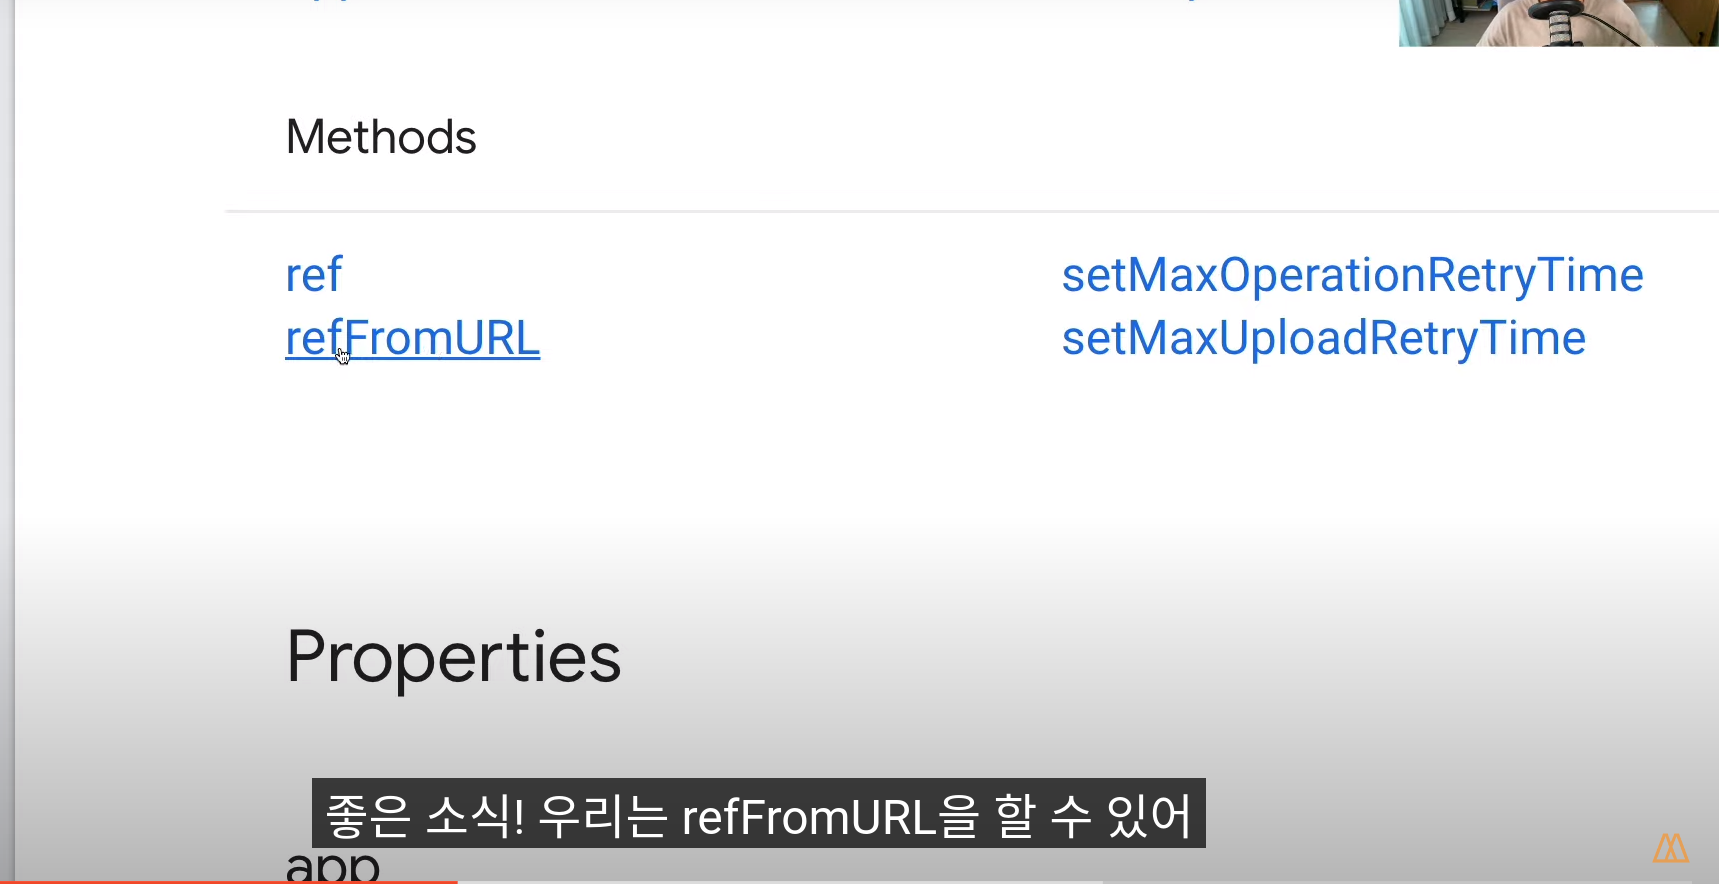

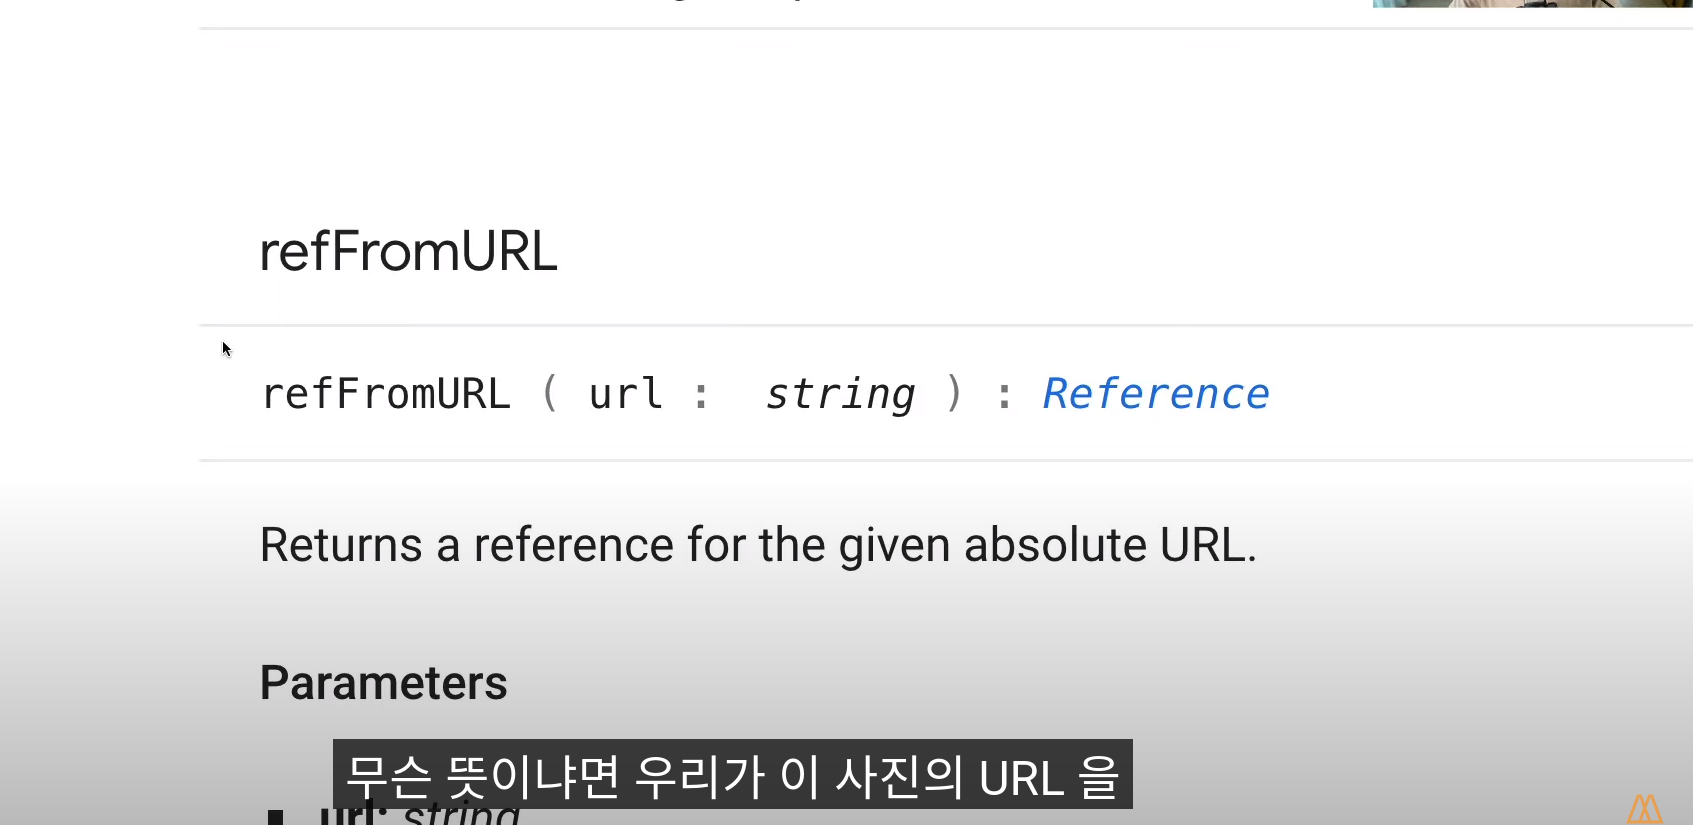

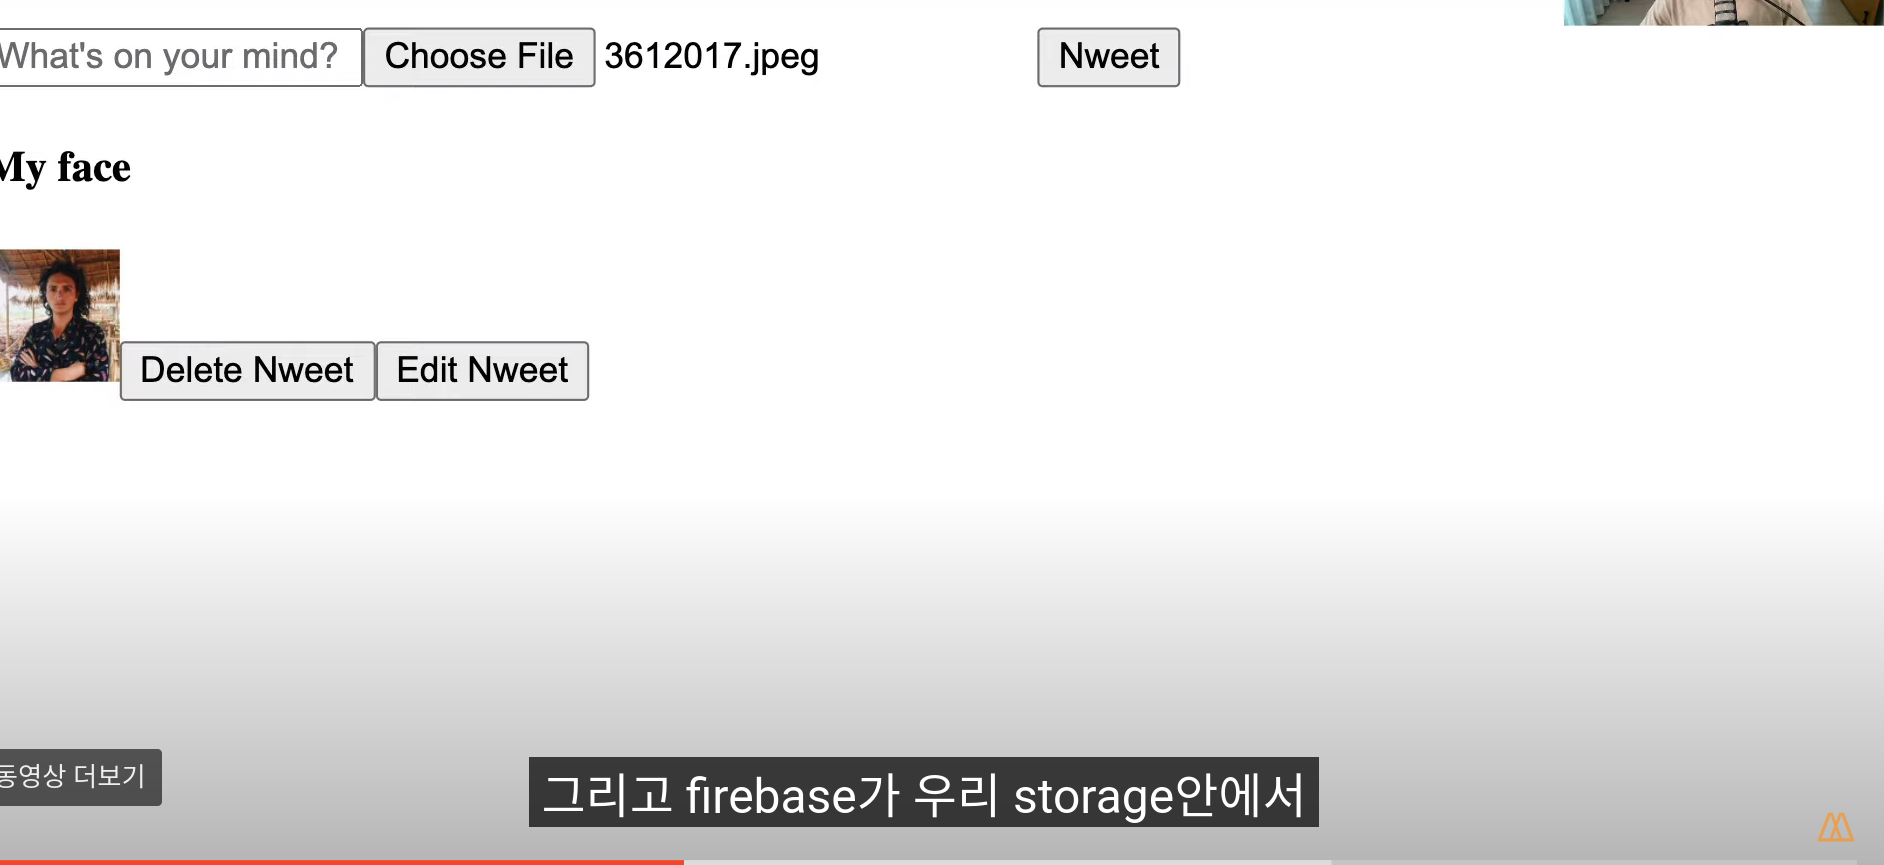

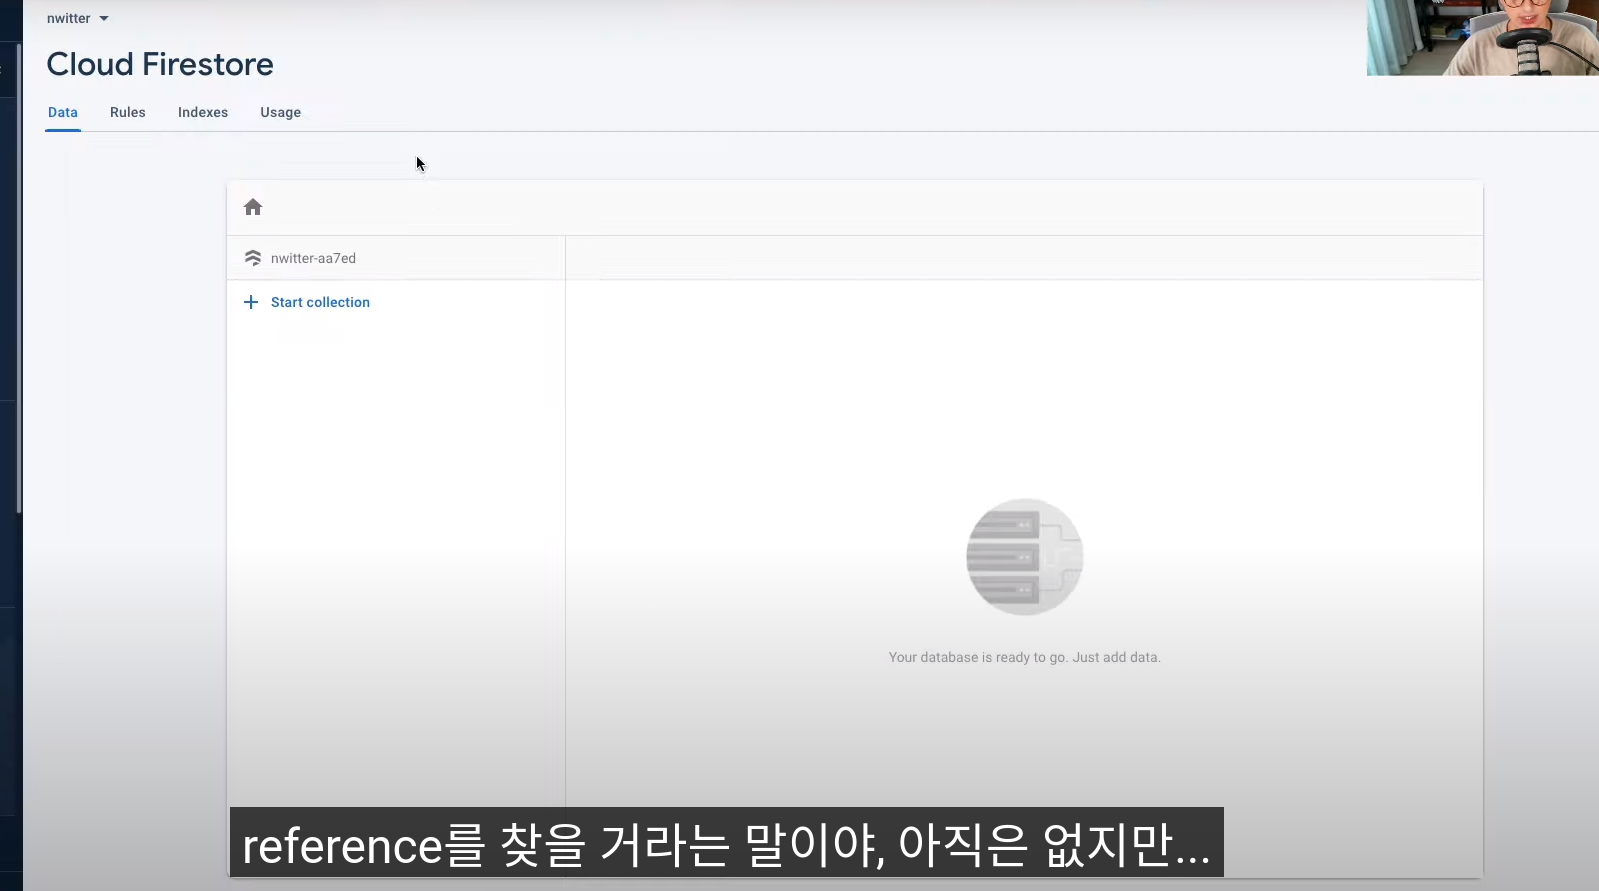

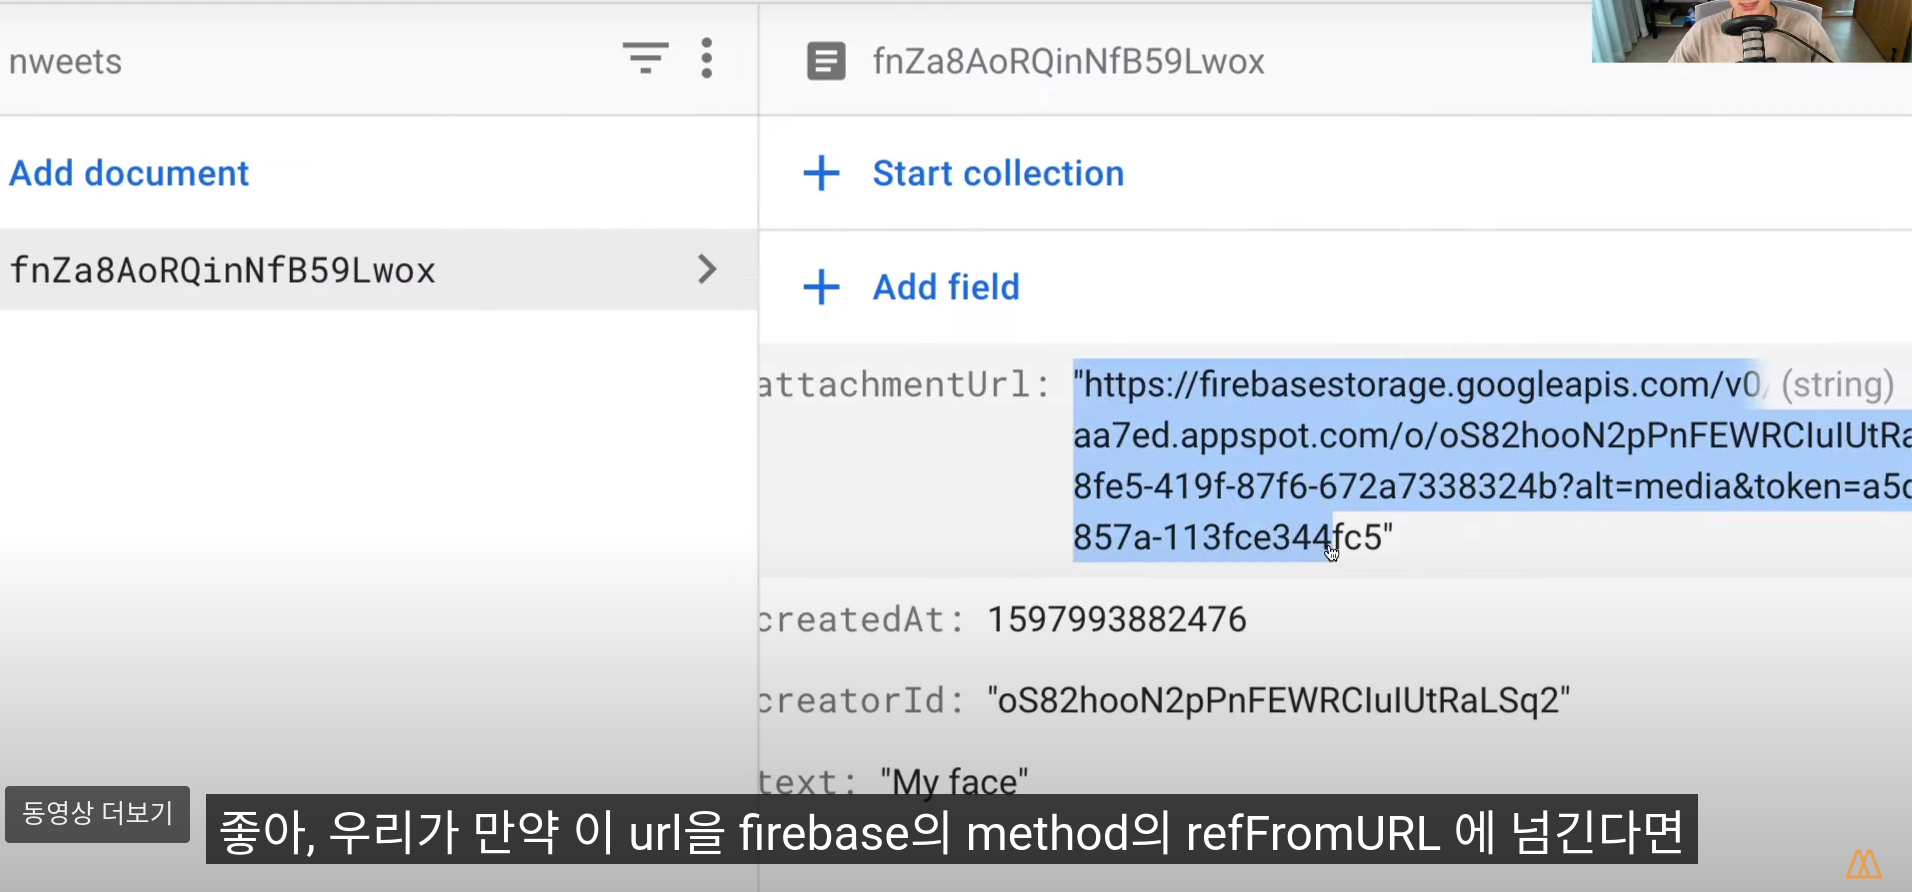

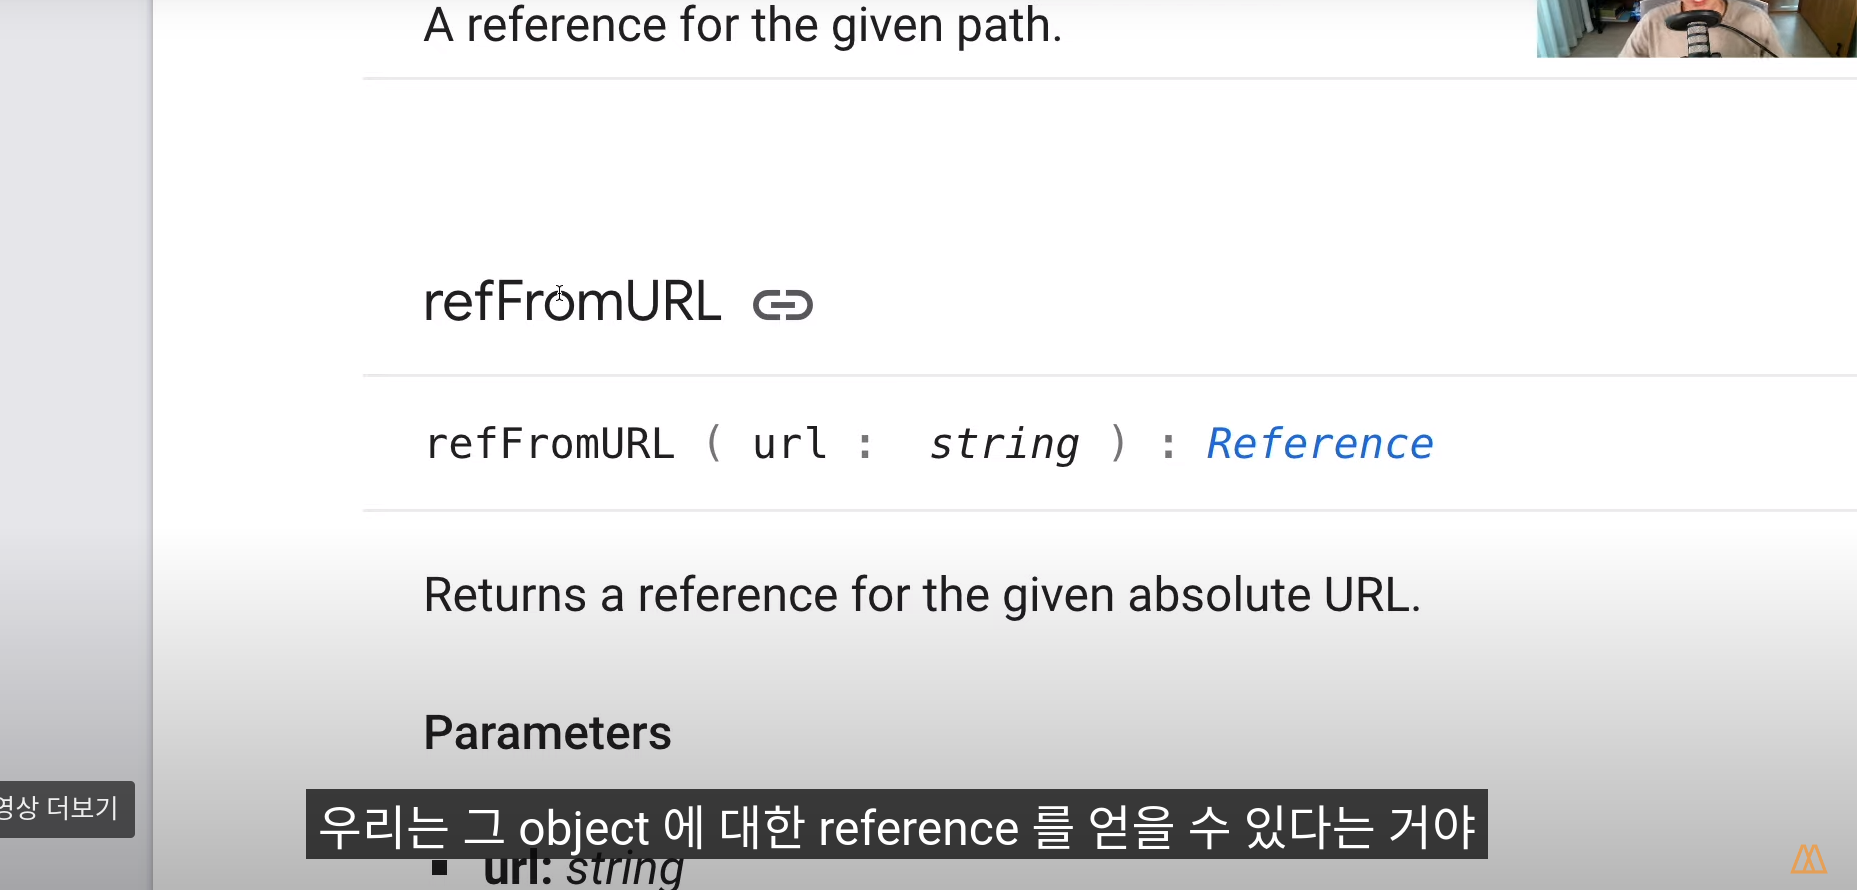

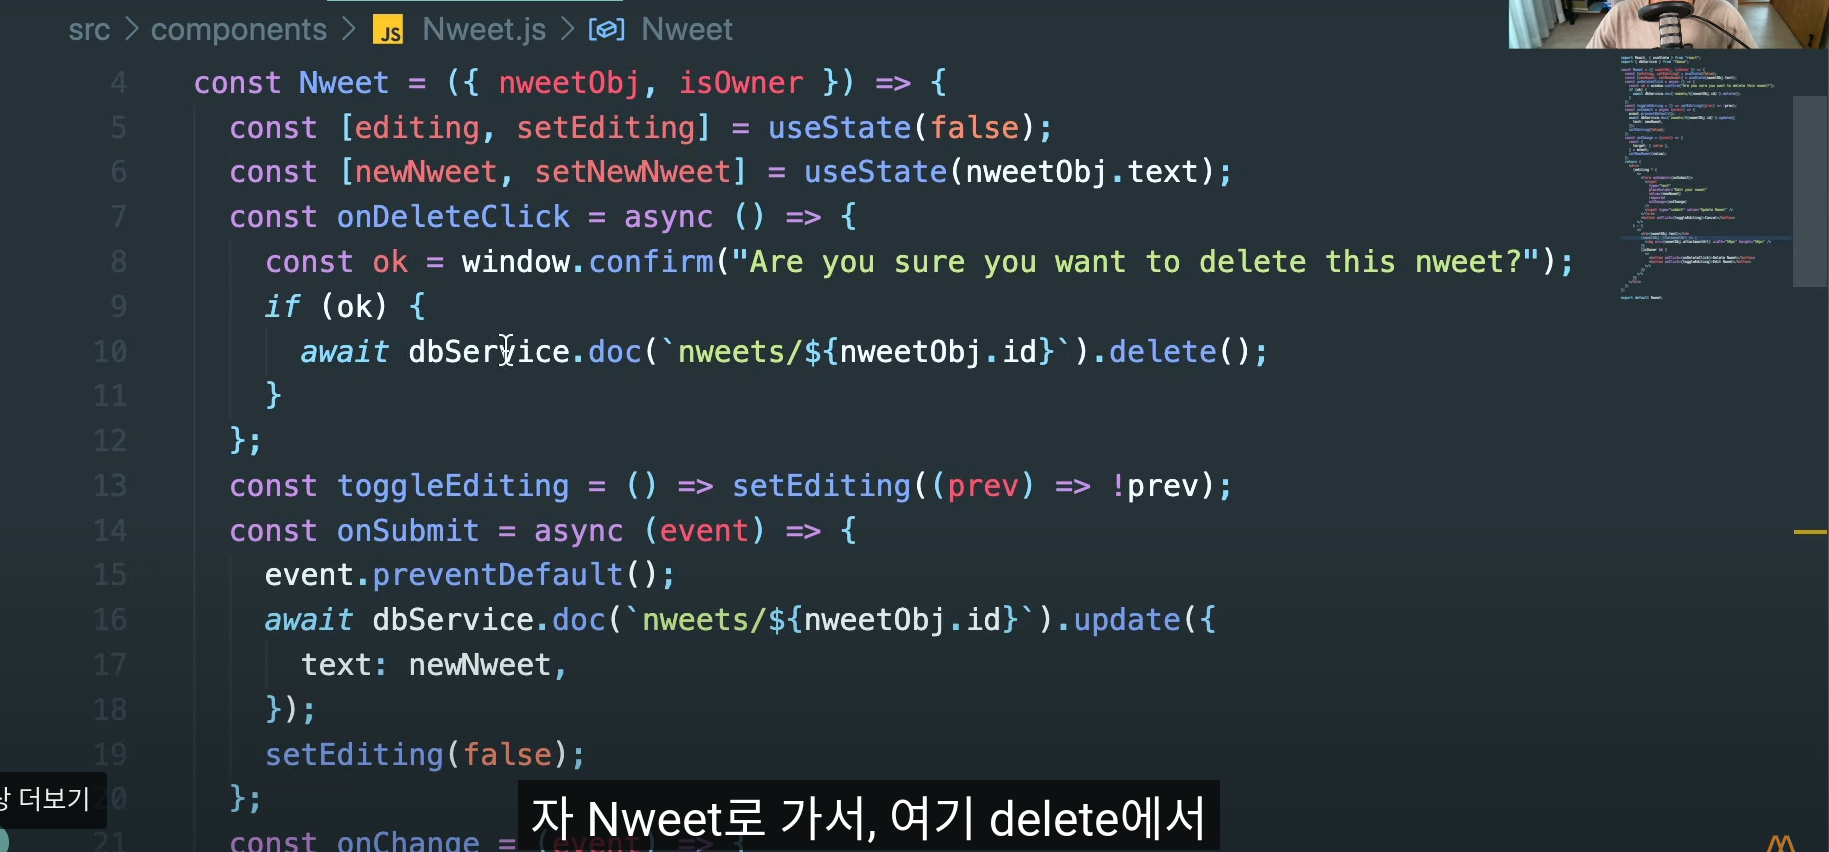

```jsx
import { dbService, storageService } from "fbase";
import { doc, deleteDoc, updateDoc } from "firebase/firestore";
import { deleteObject, ref } from "@firebase/storage";
import { useState } from "react";

function Jweet({ jweetObj, isOwner }) {
  const [editing, setEditing] = useState(false);
  const [newJweet, setNewJweet] = useState(jweetObj.text);

  const JweetTextRef = doc(dbService, "jweets", `${jweetObj.id}`);
  const urlRef = ref(storageService, jweetObj.attachmentUrl);
  const onDeleteClick = async () => {
    const ok = window.confirm("Are you sure you want to delete this jweet?");
    if (ok) {
      // 이미지 url이 존재한다면 삭제
      if (jweetObj.attachmentUrl) {
        await deleteObject(urlRef);
      }
      // 트윗 삭제
      // delete jweet
      await deleteDoc(JweetTextRef);
    }
  };

  const toggleEditing = () => setEditing((prev) => !prev);

  const onSubmit = async (event) => {
    event.preventDefault();
    if (!newJweet) {
      return;
    }
    // update
    await updateDoc(JweetTextRef, {
      text: newJweet,
      updatedAt: Date.now(),
    });
    setEditing(false);
  };

  const onChange = (event) => {
    const {
      target: { value },
    } = event;
    setNewJweet(value);
  };

  return (
    <div>
      {editing ? (
        <>
          <form onSubmit={onSubmit}>
            <input
              type="text"
              placeholder="Edit your jweet"
              value={newJweet}
              onChange={onChange}
              required
            />
            <input type="submit" value="Update Jweet" />
          </form>
          <button onClick={toggleEditing}>Cancel</button>
        </>
      ) : (
        <>
          <h4>{jweetObj.text}</h4>
          {jweetObj.attachmentUrl && (
            <img
              src={jweetObj.attachmentUrl}
              alt="userImage"
              width="50px"
              height="50px"
            />
          )}
          {isOwner && (
            <>
              <button onClick={onDeleteClick}>Delete Jweet</button>
              <button onClick={toggleEditing}>Edit Jweet</button>
            </>
          )}
        </>
      )}
    </div>
  );
}

export default Jweet;

```